In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime

btc = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

In [7]:
# Drops N/A records 
df = btc.dropna()
# Resets index so the data columns reset after dropping the N/A's
df.reset_index(inplace=True, drop=True)
# Changes Timestamp variable to read it in normal time and not UNIX timestamps.
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
# Last 5 records of cleaned data
df.tail(5)

<ipython-input-7-6f2b37c68d7a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
3613764,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
3613765,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
3613766,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
3613767,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
3613768,2021-03-31 00:00:00,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


In [8]:
df.corr()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Open,1.000000,0.999999,0.999999,0.999999,-0.051860,0.344074,0.999999
High,0.999999,1.000000,0.999998,0.999999,-0.051717,0.344498,0.999999
Low,0.999999,0.999998,1.000000,0.999999,-0.052040,0.343541,1.000000
Close,0.999999,0.999999,0.999999,1.000000,-0.051877,0.344036,1.000000
Volume_(BTC),-0.051860,-0.051717,-0.052040,-0.051877,1.000000,0.352038,-0.051887
Volume_(Currency),0.344074,0.344498,0.343541,0.344036,0.352038,1.000000,0.344010
Weighted_Price,0.999999,0.999999,1.000000,1.000000,-0.051887,0.344010,1.000000


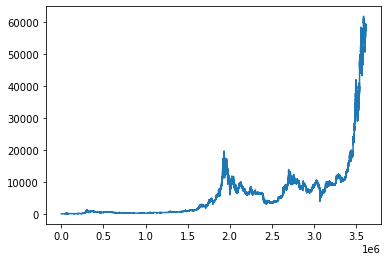

In [9]:
plt.plot(df.High)

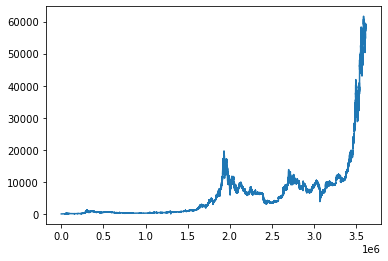

In [10]:
plt.plot(df.Low)

In [11]:
# Daily
df.index = df.Timestamp
df = df.resample('D').mean()

# Monthly
df_month = df.resample('M').mean()

# Yearly
df_year = df.resample('A-DEC').mean()

# Quarterly
df_Q = df.resample('Q-DEC').mean()

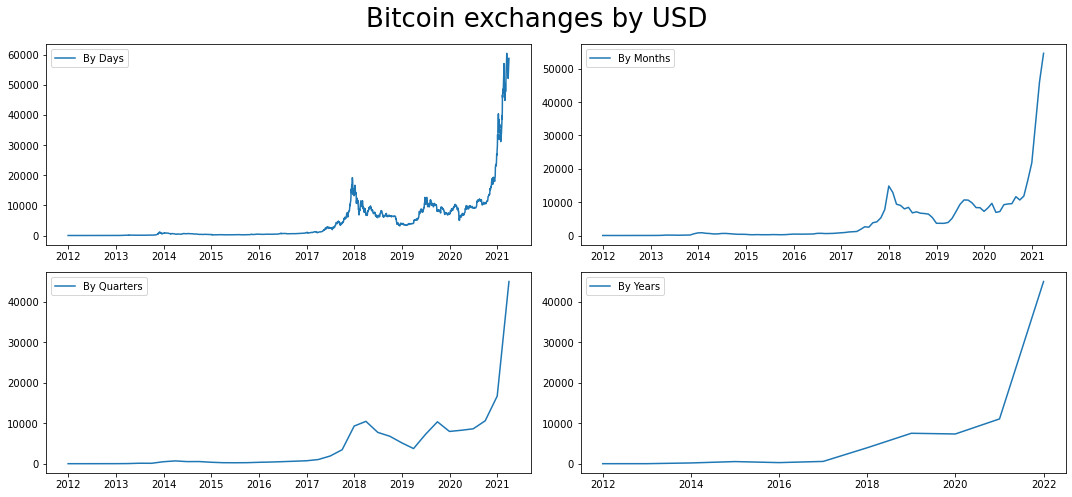

In [12]:
# Plots of each different time frame
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges by USD', fontsize=26)

plt.subplot(221)
plt.plot(df.Weighted_Price, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Weighted_Price, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Weighted_Price, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.Weighted_Price, '-', label='By Years')

plt.legend()
plt.tight_layout()
plt.show()

In [40]:
df.describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000
mean,4605.644798,4608.916329,4602.220278,4605.640430,10.355675,31790.810259,4605.576442
std,8207.258774,8213.768034,8200.562238,8207.368264,8.897358,62753.976425,8207.031620
min,4.331667,4.331667,4.331667,4.331667,0.250000,1.227500,4.331667
25%,244.954735,245.046306,244.869102,244.959590,4.671673,1916.186042,244.952580
50%,697.954849,698.221190,697.654114,697.921509,7.622244,6832.004108,697.948484
75%,7242.739376,7248.233526,7238.040275,7242.417035,13.114867,36074.508308,7242.892623
max,60458.339735,60488.868334,60426.441554,60458.888892,119.522868,950995.602917,60455.844831


In [15]:
## Showing difference in length of raw data set and cleaned data set

len(btc)

4857377

In [16]:
len(df)

3379